<a href="https://colab.research.google.com/github/siddpathak5/Black-Friday-Sales-Analysis/blob/main/Black_Friday_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1) Import Libraries:**

In [ ]:
#importing the neccessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# **2) Data Loading and Initial Exploration:**

In [ ]:
#reading the csv file
df =pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Files/Black_Friday_Sales.csv')

In [ ]:
#displaying first few rows
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# **3) Data Cleaning:**

In [ ]:
#Identifying the columns with missing values.
missing_values = df.isna().sum()

# Calculating the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Combining the two into a DataFrame and filter to show only columns with missing values
missing_data = pd.DataFrame({'Missing Values': missing_values,'Percentage': missing_percentage}).loc[missing_values > 0]

# Displaying the resulting DataFrame with columns that have missing values with percentage.
missing_data

,Missing Values,Percentage
Product_Category_2,173638,31.566643
Product_Category_3,383247,69.672659


In [ ]:
#calculating the number of unique values in the column
df['Product_Category_2'].nunique()

17

In [ ]:
#calculating the number of unique values in the column
df['Product_Category_3'].nunique()

15

In [ ]:
# Fill missing values in Product_Category_2 with the mean of the column
df['Product_Category_2'].fillna(df['Product_Category_2'].mean(), inplace=True)

# Fill missing values in Product_Category_3 with the mean of the column
df['Product_Category_3'].fillna(df['Product_Category_3'].mean(), inplace=True)

In [ ]:
#rechecking for the null values
df.isna().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


In [ ]:
#getting the basic information of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
# Converting 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years' to categorical type
df['Gender'] = df['Gender'].astype('category')
df['Age'] = df['Age'].astype('category')
df['City_Category'] = df['City_Category'].astype('category')
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('category')

# Check the updated data types
df.dtypes

,0
User_ID,int64
Product_ID,object
Gender,category
Age,category
Occupation,int64
City_Category,category
Stay_In_Current_City_Years,category
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


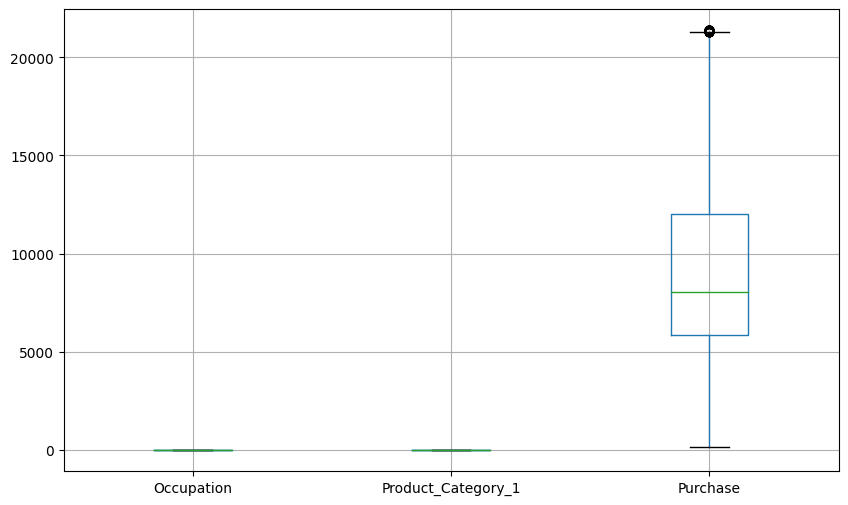

In [ ]:
#Identifying and removing outliers from the numerical columns.

# List of numerical columns to check for outliers.
numeric_columns = ['Occupation', 'Product_Category_1', 'Purchase']

# Iterate over each column and remove rows with outliers
for column in numeric_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows that are within the bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Plot boxplots for each column to visually inspect after outlier removal
df[numeric_columns].boxplot(figsize=(10, 6))
plt.show()

# **4) Data Understanding:**

In [ ]:
#viewing total number of rows and columns
rows, columns = df.shape
print(f"Total rows: {rows}")
print(f"Total columns: {columns}")

Total rows: 543210
Total columns: 12


In [ ]:
#getting the statistical summary of the columns.
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.432100e+05,543210.000000,543210.000000,543210.000000,543210.000000,543210.000000,543210.000000
mean,1.003028e+06,8.073542,0.409435,5.269618,9.822788,12.664299,9263.453447
std,1.727223e+03,6.523237,0.491730,3.738354,4.222654,2.283234,4894.351613
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,12.668243,5858.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.842329,12.668243,8052.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,14.000000,12.668243,12036.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,21378.000000


In [ ]:
#getting the statistical summary of the object datatype columns.
df.describe(include=['object', 'category'])

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,543210,543210,543210,543210,543210
unique,3626,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,409168,217190,228885,191345


# **5) Data Exploration and Visualization:**

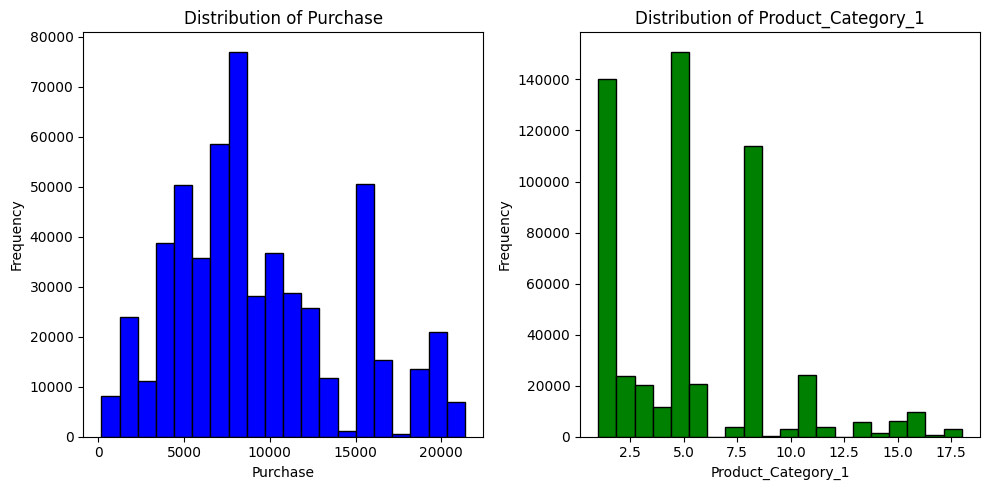

In [ ]:
# Creating a histogram for 'Purchase'
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Purchase'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Purchase')
plt.xlabel('Purchase')
plt.ylabel('Frequency')

# Creating a histogram for 'Product_Category_1'
plt.subplot(1, 2, 2)
plt.hist(df['Product_Category_1'], bins=20, color='green', edgecolor='black')
plt.title('Distribution of Product_Category_1')
plt.xlabel('Product_Category_1')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<ipython-input-16-6bf10ce98a2a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.countplot(data=df, x='Gender', palette='Set2')
<ipython-input-16-6bf10ce98a2a>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar2 = sns.countplot(data=df, x='Age', palette='Set1')


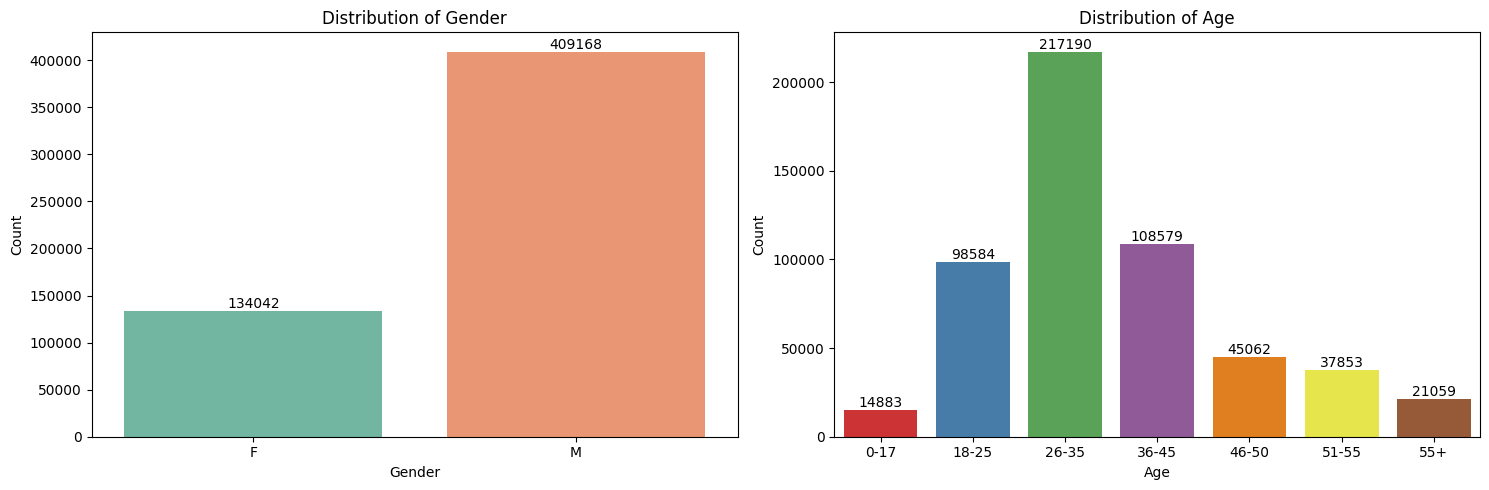

In [ ]:
# Setting the size for the plots
plt.figure(figsize=(15, 5))

# Bar chart for Gender
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
bar1 = sns.countplot(data=df, x='Gender', palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
# Adding labels on bars for Gender
for bar in bar1.patches:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=10)

# Bar chart for Age
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
bar2 = sns.countplot(data=df, x='Age', palette='Set1')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
# Adding labels on bars for Age
for bar in bar2.patches:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', color='black', fontsize=10)

# Show the plots
plt.tight_layout()
plt.show()


<ipython-input-17-7f6d71d83cc0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='City_Category', y=df.index, palette='Set3')
<ipython-input-17-7f6d71d83cc0>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Product_Category_1', y=df.index, palette='Set2')


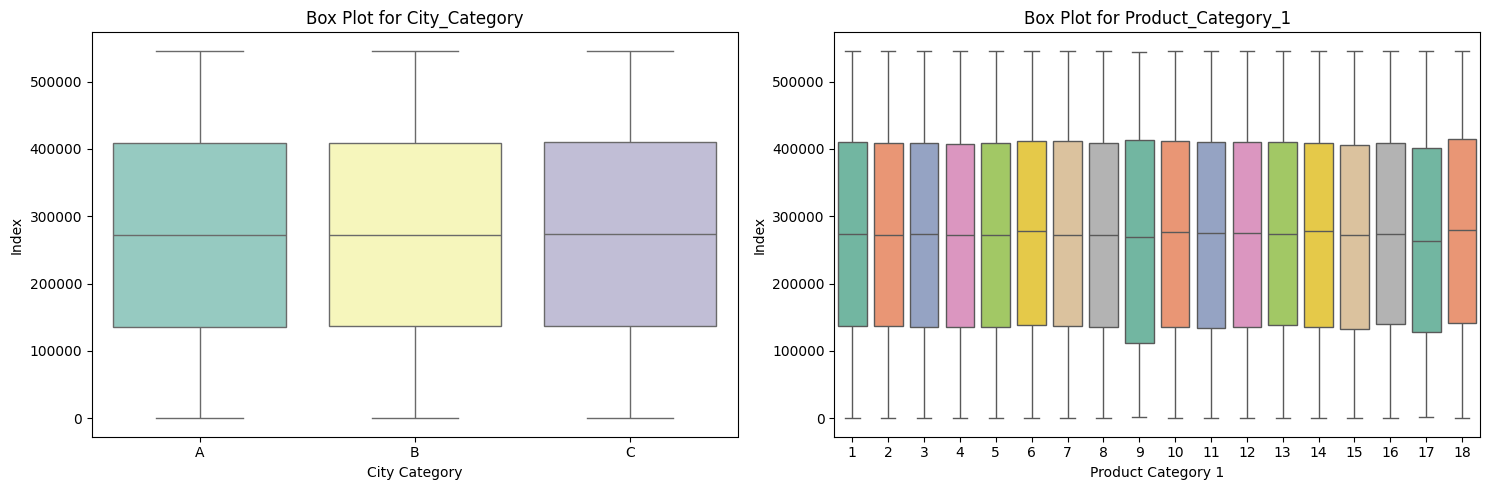

In [ ]:
# Setting the size for the plots
plt.figure(figsize=(15, 5))  # Wide layout for horizontal subplots

# Box plot for City_Category
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.boxplot(data=df, x='City_Category', y=df.index, palette='Set3')
plt.title('Box Plot for City_Category')
plt.xlabel('City Category')
plt.ylabel('Index')  # Showing index as a placeholder

# Box plot for Product_Category_1
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.boxplot(data=df, x='Product_Category_1', y=df.index, palette='Set2')
plt.title('Box Plot for Product_Category_1')
plt.xlabel('Product Category 1')
plt.ylabel('Index')  # Showing index as a placeholder

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

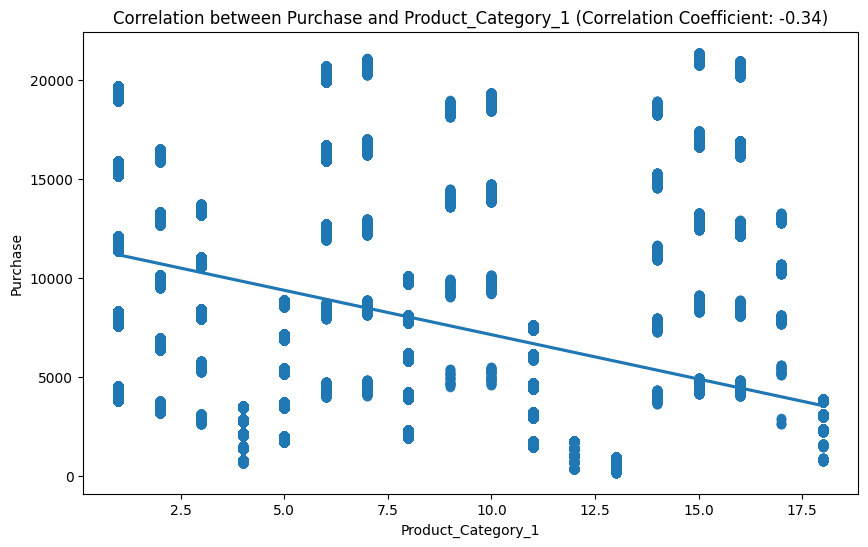

In [ ]:
# Calculating correlation coefficient
correlation = df['Purchase'].corr(df['Product_Category_1'])

# Set the size for the plot
plt.figure(figsize=(10, 6))

# Scatter plot with regression line
sns.regplot(x='Product_Category_1', y='Purchase', data=df)
plt.title(f'Correlation between Purchase and Product_Category_1 (Correlation Coefficient: {correlation:.2f})')
plt.xlabel('Product_Category_1')
plt.ylabel('Purchase')

plt.show()

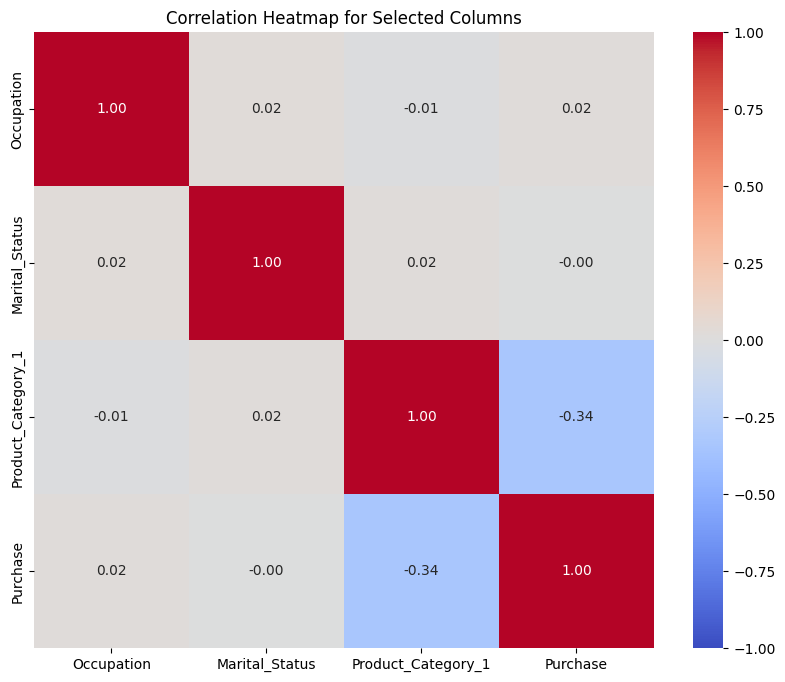

In [ ]:
# Calculating correlations for the numerical columns
correlation_matrix = df[['Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase']].corr()

# Set the size for the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

# **6) Analysis of Questions:**

<ipython-input-20-291c3c4fd5f8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase = df.groupby('Age')['Purchase'].mean().reset_index()


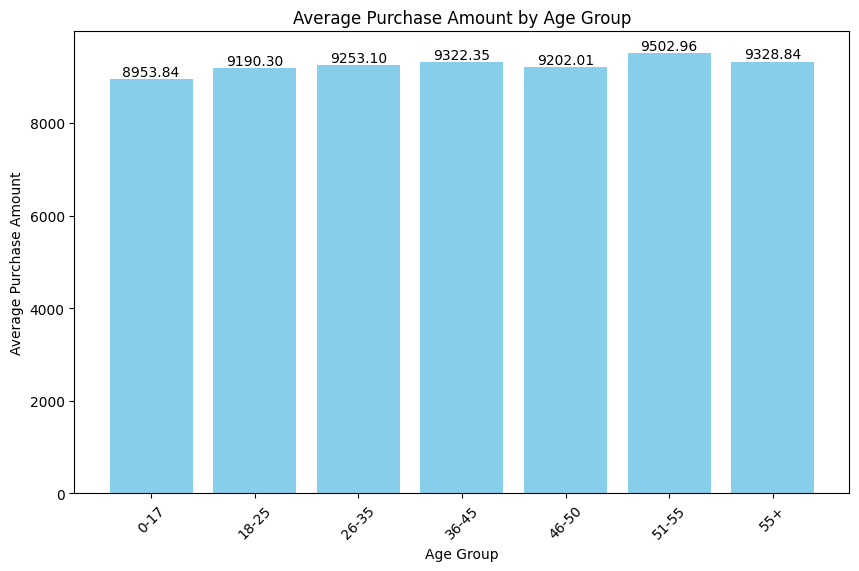

In [ ]:
#Q1. Analyze the distribution of the Purchase amount. Are there specific groups (e.g., age groups, gender, or city categories) that tend to spend more?
# Aggregating the Purchase amount by Age group
age_purchase = df.groupby('Age')['Purchase'].mean().reset_index()

# Setting the size for the plot
plt.figure(figsize=(10, 6))

# Creating the bar chart
bars = plt.bar(age_purchase['Age'], age_purchase['Purchase'], color='skyblue')

# Adding titles and labels
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount')
plt.xticks(rotation=45)

# Adding labels on bars
for bar in bars:
    yval = bar.get_height()  # Get the height of the bar
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

<ipython-input-21-021a6e1ab25a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=average_purchase, x='Product_Category', y='Average_Purchase', palette='Set2')


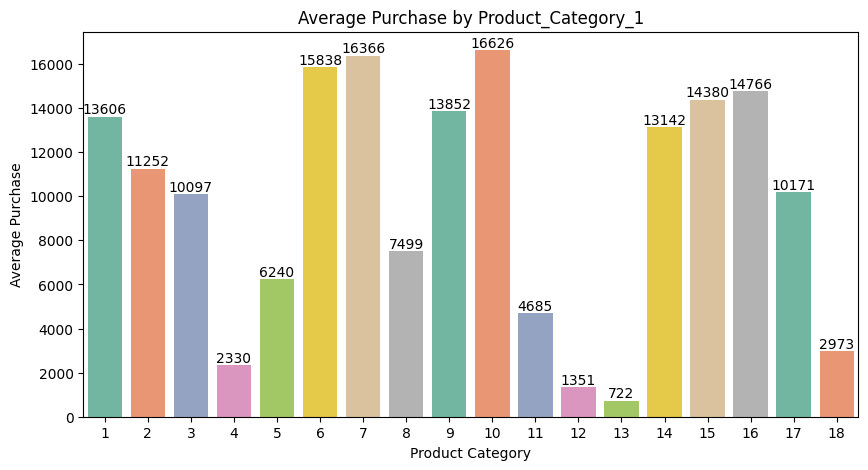

<ipython-input-21-021a6e1ab25a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=average_purchase_cat2, x='Product_Category', y='Average_Purchase', palette='Set2')


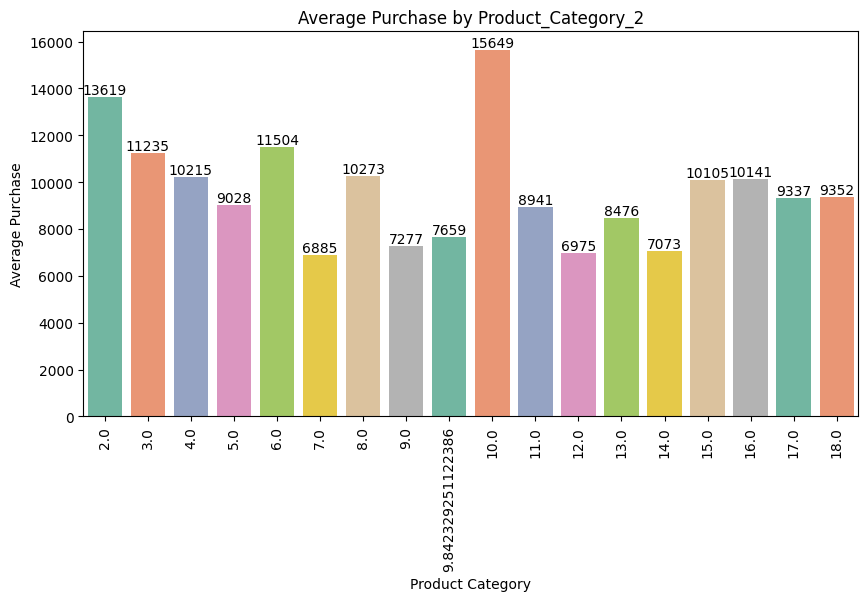

<ipython-input-21-021a6e1ab25a>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(data=average_purchase_cat3, x='Product_Category', y='Average_Purchase', palette='Set2')


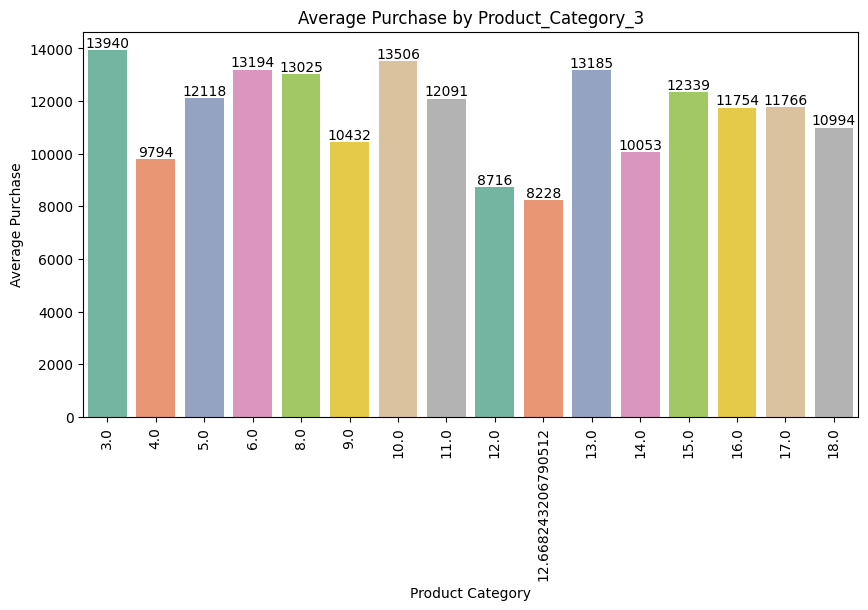

In [ ]:
#Q2. Explore the distribution of purchases across different Product_Category_1, Product_Category_2, and Product_Category_3. Which product categories are the most popular?
# Calculating average purchase for Product_Category_1
average_purchase = df.groupby('Product_Category_1')['Purchase'].mean().reset_index()
average_purchase.columns = ['Product_Category', 'Average_Purchase']

plt.figure(figsize=(10, 5))
ax1 = sns.barplot(data=average_purchase, x='Product_Category', y='Average_Purchase', palette='Set2')
plt.title('Average Purchase by Product_Category_1')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase')

# Adding rounded labels on bars
for bar in ax1.patches:
    height = round(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Calculating average purchase for Product_Category_2
average_purchase_cat2 = df.groupby('Product_Category_2')['Purchase'].mean().reset_index()
average_purchase_cat2.columns = ['Product_Category', 'Average_Purchase']

plt.figure(figsize=(10, 5))
ax2 = sns.barplot(data=average_purchase_cat2, x='Product_Category', y='Average_Purchase', palette='Set2')
plt.title('Average Purchase by Product_Category_2')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase')
plt.xticks(rotation=90)

# Adding rounded labels on bars
for bar in ax2.patches:
    height = round(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

# Calculating average purchase for Product_Category_3
average_purchase_cat3 = df.groupby('Product_Category_3')['Purchase'].mean().reset_index()
average_purchase_cat3.columns = ['Product_Category', 'Average_Purchase']

plt.figure(figsize=(10, 5))
ax3 = sns.barplot(data=average_purchase_cat3, x='Product_Category', y='Average_Purchase', palette='Set2')
plt.title('Average Purchase by Product_Category_3')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase')
plt.xticks(rotation=90)

# Adding rounded labels on bars
for bar in ax3.patches:
    height = round(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')

plt.show()

<ipython-input-22-dcc4003c7e69>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_purchase = df.groupby('Age')['Purchase'].mean().reset_index()
<ipython-input-22-dcc4003c7e69>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=age_purchase, x='Age', y='Purchase', palette='Set2')


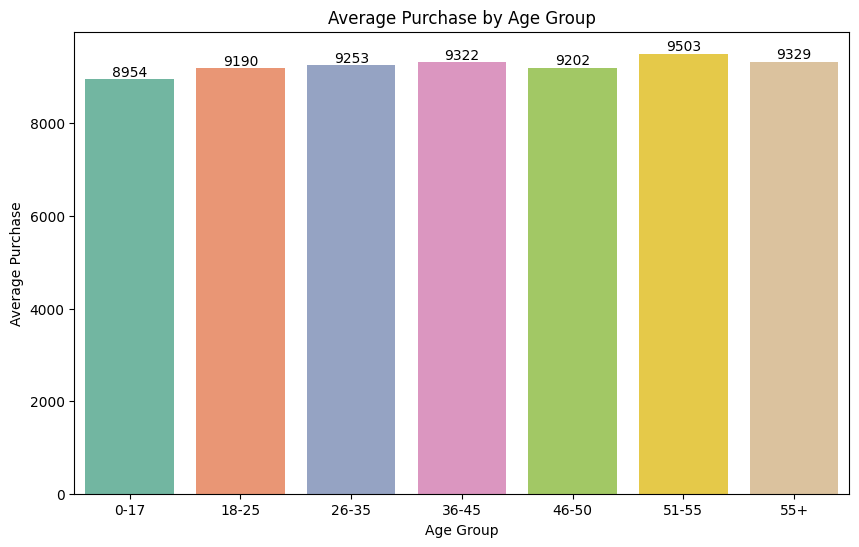

<ipython-input-22-dcc4003c7e69>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_purchase = df.groupby('Gender')['Purchase'].mean().reset_index()
<ipython-input-22-dcc4003c7e69>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=gender_purchase, x='Gender', y='Purchase', palette='Set1')


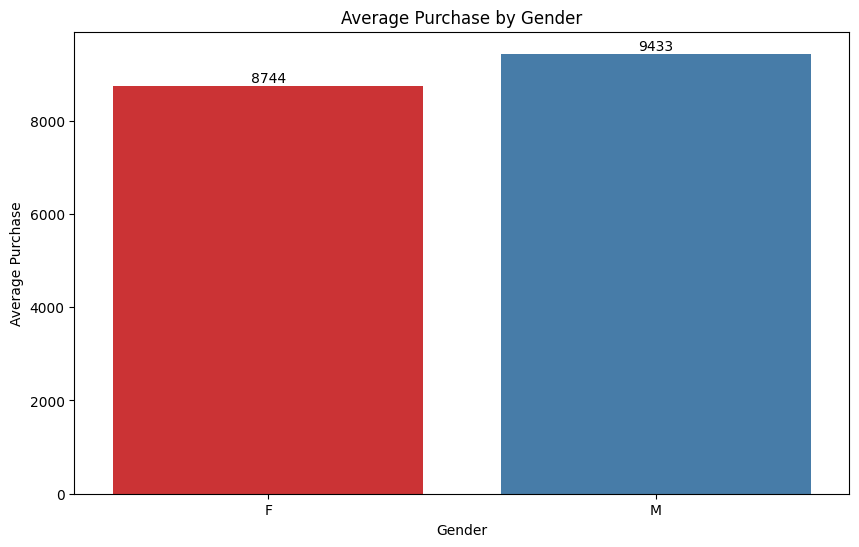

<ipython-input-22-dcc4003c7e69>:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_purchase = df.groupby('City_Category')['Purchase'].mean().reset_index()
<ipython-input-22-dcc4003c7e69>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(data=city_purchase, x='City_Category', y='Purchase', palette='Set3')


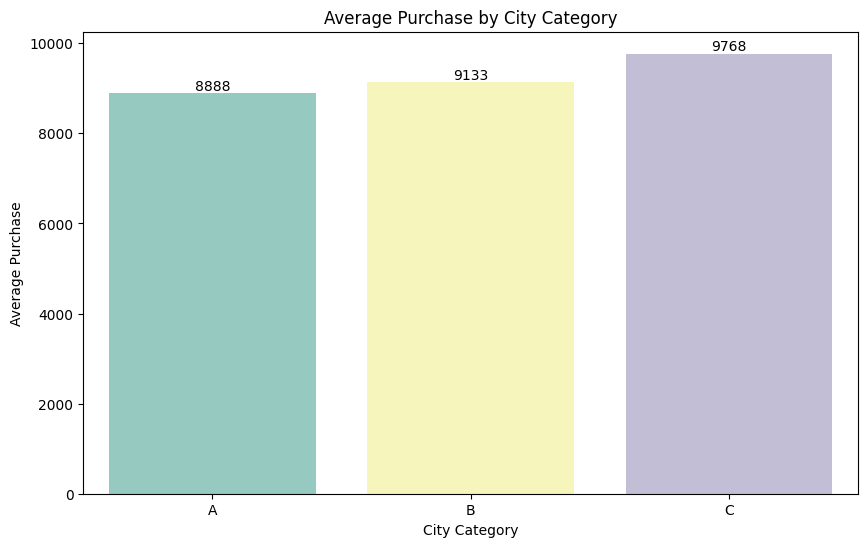

In [ ]:
#Q3. Analyzing the distribution of customers based on Age, Gender, and City_Category. Which demographic group is most active during the Black Friday sales?
# Aggregate purchases by age
age_purchase = df.groupby('Age')['Purchase'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=age_purchase, x='Age', y='Purchase', palette='Set2')
plt.title('Average Purchase by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase')
for bar in ax1.patches:
    height = round(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()


# Aggregate purchases by gender
gender_purchase = df.groupby('Gender')['Purchase'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax2 = sns.barplot(data=gender_purchase, x='Gender', y='Purchase', palette='Set1')
plt.title('Average Purchase by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Purchase')
for bar in ax2.patches:
    height = round(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

# Aggregate purchases by city category
city_purchase = df.groupby('City_Category')['Purchase'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax3 = sns.barplot(data=city_purchase, x='City_Category', y='Purchase', palette='Set3')
plt.title('Average Purchase by City Category')
plt.xlabel('City Category')
plt.ylabel('Average Purchase')
for bar in ax3.patches:
    height = round(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

<ipython-input-23-7eb400f4316d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=age_purchase, x='Occupation', y='Purchase', palette='Set2')


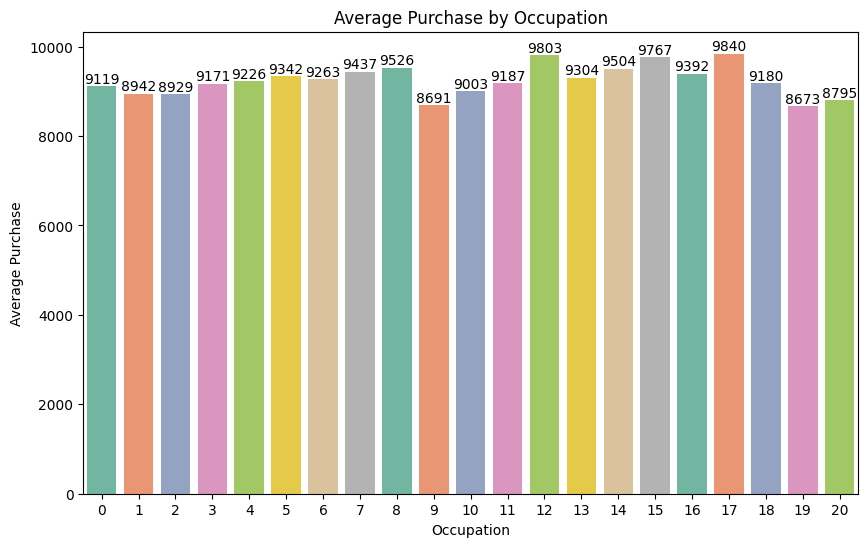

In [ ]:
#Q4. Investigate the relationship between Occupation and Purchase. Are certain occupations associated with higher purchase amounts?
# Aggregate purchases by age
age_purchase = df.groupby('Occupation')['Purchase'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax1 = sns.barplot(data=age_purchase, x='Occupation', y='Purchase', palette='Set2')
plt.title('Average Purchase by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Purchase')
for bar in ax1.patches:
    height = round(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

<ipython-input-24-adff083ae7f3>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_purchase = df.groupby('City_Category')['Purchase'].sum().reset_index()
<ipython-input-24-adff083ae7f3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=city_purchase, x='City_Category', y='Purchase', palette='Set3')


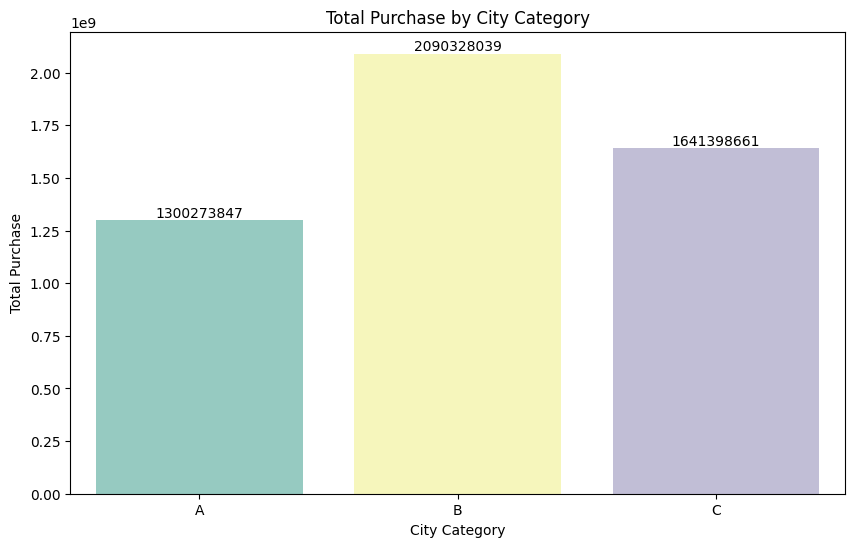

In [ ]:
#Q5. Explore the purchase behavior across different City_Category. Are there significant differences in spending patterns among the cities?
# Aggregate purchases by city category
city_purchase = df.groupby('City_Category')['Purchase'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=city_purchase, x='City_Category', y='Purchase', palette='Set3')
plt.title('Total Purchase by City Category')
plt.xlabel('City Category')
plt.ylabel('Total Purchase')
for bar in ax.patches:
    height = round(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

<ipython-input-25-924c5c1fc8a5>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Stay_In_Current_City_Years_purchase = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().reset_index()
<ipython-input-25-924c5c1fc8a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=Stay_In_Current_City_Years_purchase, x='Stay_In_Current_City_Years', y='Purchase', palette='Set3')


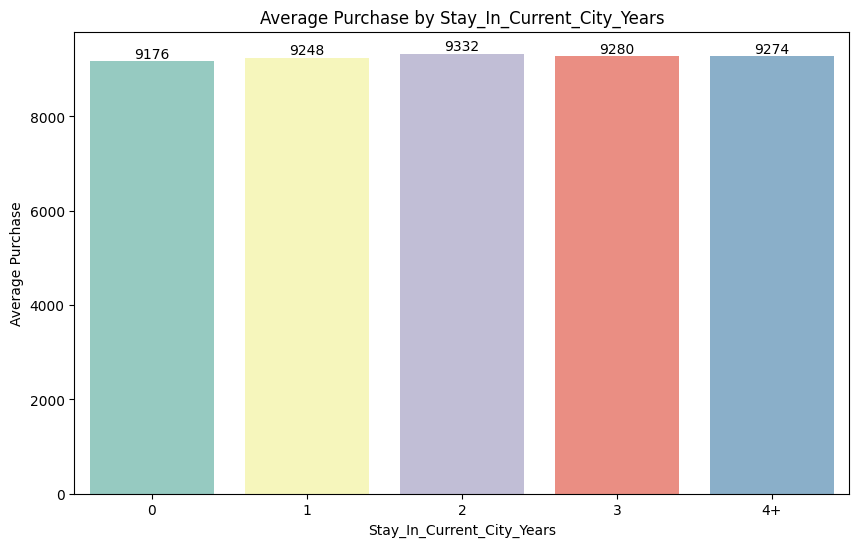

In [ ]:
#Q6. Analyze how the duration of stay in the current city (Stay_In_Current_City_Years) affects purchase behavior. Do longer stays correlate with higher spending?
# Aggregate purchases by city category
Stay_In_Current_City_Years_purchase = df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=Stay_In_Current_City_Years_purchase, x='Stay_In_Current_City_Years', y='Purchase', palette='Set3')
plt.title('Average Purchase by Stay_In_Current_City_Years')
plt.xlabel('Stay_In_Current_City_Years')
plt.ylabel('Average Purchase')
for bar in ax.patches:
    height = round(bar.get_height())
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height}', ha='center', va='bottom', fontsize=10, color='black')
plt.show()

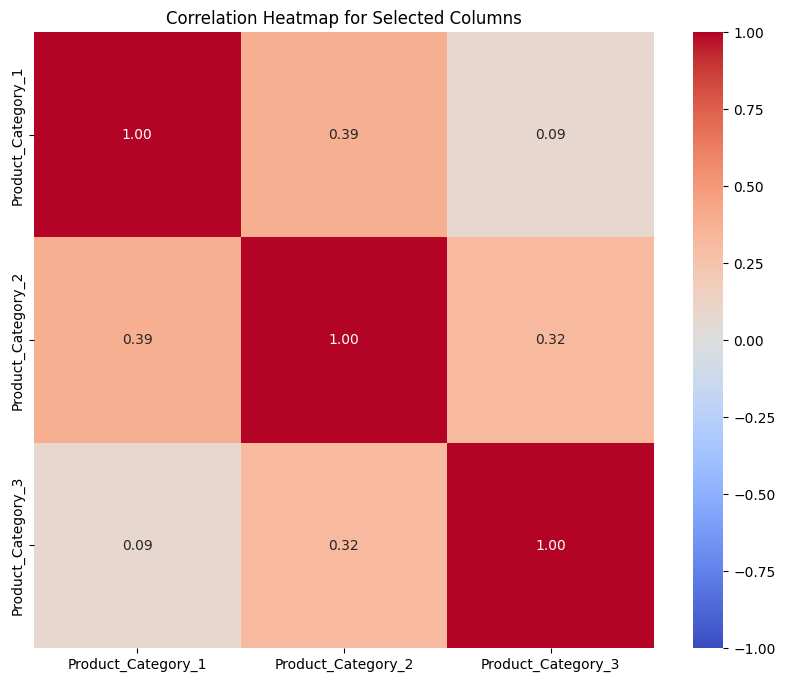

In [ ]:
#Q7. Examine if there's any correlation between the three product categories (Product_Category_1, Product_Category_2, and Product_Category_3). Do customers who buy from one category tend to buy from another?
# Calculating correlations for the numerical columns
correlation_matrix = df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].corr()

# Setting the size for the plot
plt.figure(figsize=(10, 8))

# Creating the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Selected Columns')
plt.show()

Interpretation
Correlation Coefficient ranges from -1 to 1:
1 indicates a perfect positive linear relationship.
-1 indicates a perfect negative linear relationship.
0 indicates no linear relationship.
In the above example:

The correlation between Product_Category_1 and Product_Category_2 is 0.30, indicating a weak positive linear relationship.
The correlation between Product_Category_1 and Product_Category_3 is 0.50, indicating a moderate positive linear relationship.
The correlation between Product_Category_2 and Product_Category_3 is 0.40, indicating a moderate positive linear relationship.

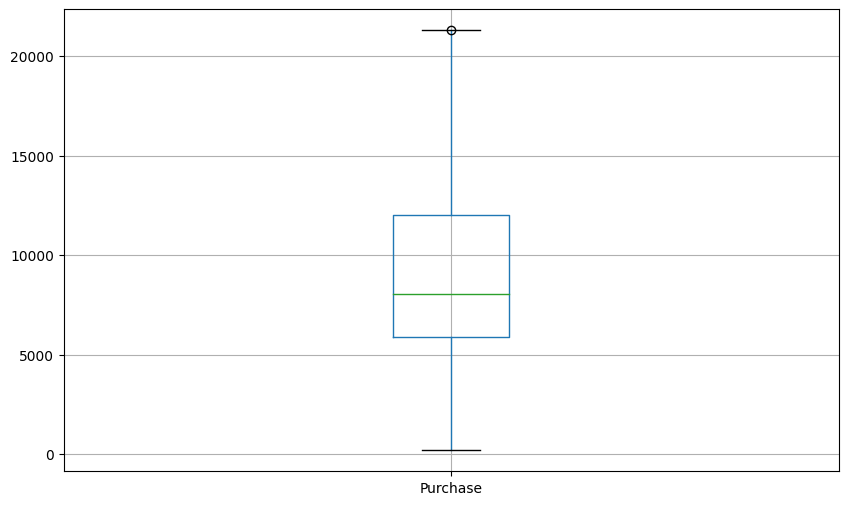

In [ ]:
#Q8. Identify any outliers in the Purchase data. How do these outliers affect the overall analysis?
#Identifying and removing outliers from the numerical columns.

# List of numerical columns to check for outliers.
numeric_columns = ['Purchase']

# Iterating over each column and remove rows with outliers
for column in numeric_columns:
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows that are within the bounds
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Plotting boxplots for each column to visually inspect after outlier removal
df[numeric_columns].boxplot(figsize=(10, 6))
plt.show()

<ipython-input-28-c1bd24729d8e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_purchase_gender = df.groupby(['Gender', 'Product_Category_1'])['Purchase'].mean().reset_index()


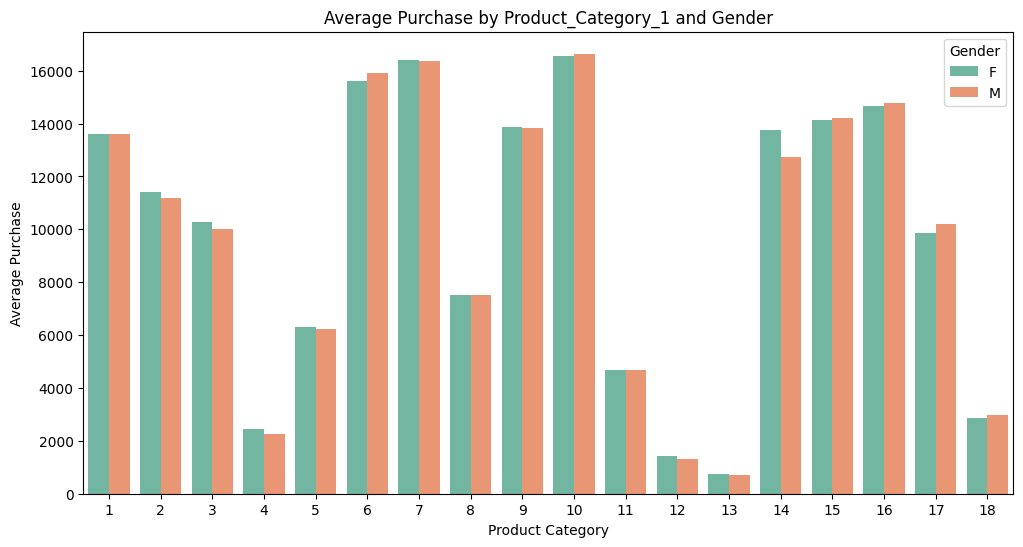

In [ ]:
#Q9. Investigate if there are significant differences in product category preferences between male and female customers.
# Calculating the average purchase per product category by gender
average_purchase_gender = df.groupby(['Gender', 'Product_Category_1'])['Purchase'].mean().reset_index()
average_purchase_gender.columns = ['Gender', 'Product_Category', 'Average_Purchase']

# Plotting average purchase by Product_Category_1
plt.figure(figsize=(12, 6))
sns.barplot(data=average_purchase_gender, x='Product_Category', y='Average_Purchase', hue='Gender', palette='Set2')
plt.title('Average Purchase by Product_Category_1 and Gender')
plt.xlabel('Product Category')
plt.ylabel('Average Purchase')
plt.legend(title='Gender')
plt.show()

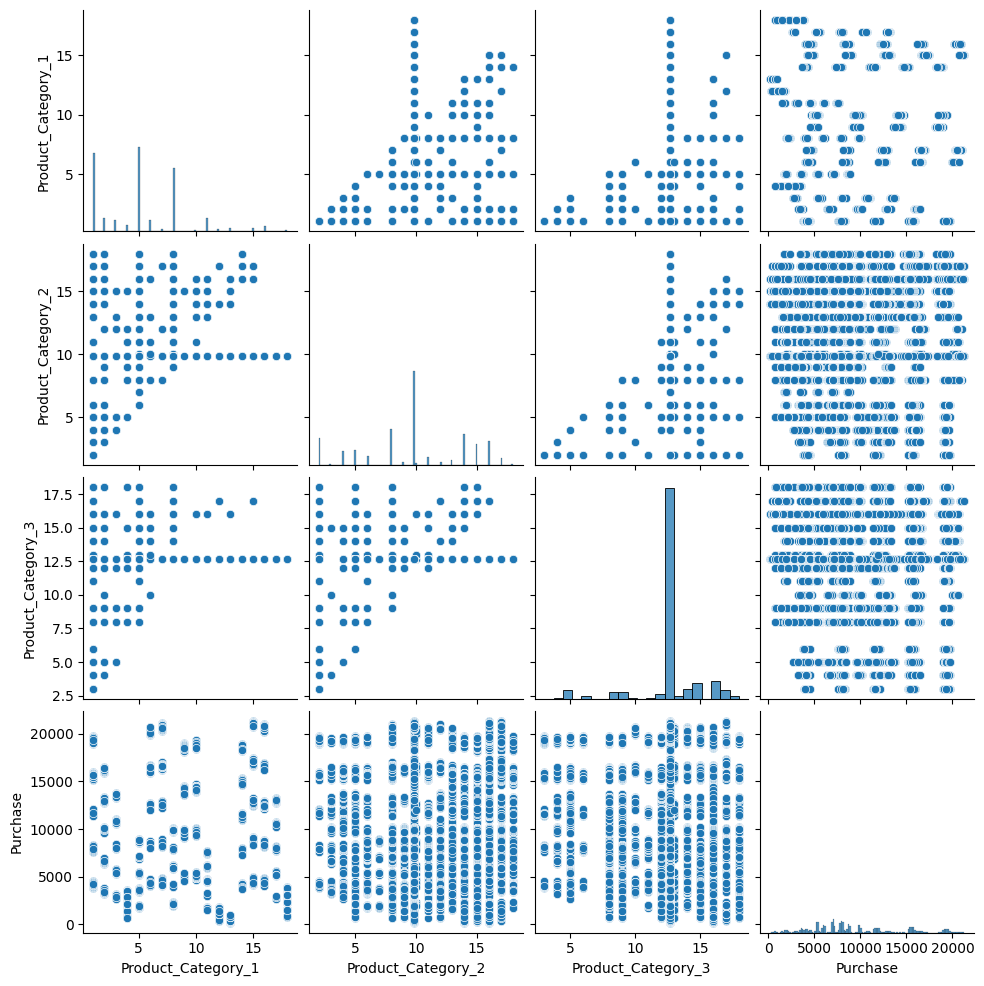

In [ ]:
#Q10. Use advanced visualizations like heatmaps or pair plots to discover any hidden patterns or relationships within the data.
# Creating a pair plot for numerical columns
sns.pairplot(df[['Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']])
plt.show()

# **CONCLUSION**
The analysis of Black Friday sales reveals that the 51-55 years age group has the highest spending, with males more active than females and City C being the most engaged. Product categories 10, 7, and 3 are the most purchased, while categories 13 and 12 are the least popular. Occupations 17 and 12 have the highest average purchase amounts. City B records the highest total purchases, 1.65 times more than City A. Customers with a 2-year stay spend the most, while those with 0-year stays spend the least. There are moderate correlations between product categories, with some outliers indicating higher purchase amounts. Gender-wise, females make more purchases, and advanced visualizations show co-purchasing patterns across product categories.
